<a href="https://colab.research.google.com/github/shuvad23/Deep-learning-with-PyTorch/blob/main/PyTorch_Training_Pipline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🔥 What Is the PyTorch Training Pipeline?

- The PyTorch training pipeline refers to the entire process of building, training, evaluating, and saving a machine learning or deep learning model using PyTorch.

- It’s not a single function — it’s a sequence of steps that together define how data flows from raw input to a trained model.

🧩 In Simple Terms

- Think of the training pipeline as the workflow that teaches your neural network how to make predictions.

- It includes everything from:

  - loading and preparing data
  
    → defining the model

    → training it using optimization

    → testing and saving the final model.


🧠 The 7 Core Steps of the PyTorch Training Pipeline:

| Step | Component               | Purpose                                            |
| ---- | ----------------------- | -------------------------------------------------- |
| 1️⃣  | **Data Preparation**    | Load and preprocess your dataset                   |
| 2️⃣  | **DataLoader**          | Efficiently feed data in batches to the model      |
| 3️⃣  | **Model Definition**    | Design the neural network architecture             |
| 4️⃣  | **Loss Function**       | Measure how far predictions are from the truth     |
| 5️⃣  | **Optimizer**           | Adjust the model weights to minimize loss          |
| 6️⃣  | **Training Loop**       | Run forward + backward passes repeatedly           |
| 7️⃣  | **Evaluation & Saving** | Test model performance and store the trained model |


🔍 How It Works — Conceptually:


       ┌────────────────────────────┐
       │        Dataset             │
       └────────────┬───────────────┘
                    │
                    ▼
           ┌───────────────────┐
           │   DataLoader      │
           └────────┬──────────┘
                    │ (batches)
                    ▼
           ┌───────────────────┐
           │     Model         │
           └────────┬──────────┘
                    │ (forward pass)
                    ▼
           ┌───────────────────┐
           │   Loss Function   │
           └────────┬──────────┘
                    │ (compute loss)
                    ▼
           ┌───────────────────┐
           │    Backprop       │
           └────────┬──────────┘
                    │ (gradients)
                    ▼
           ┌───────────────────┐
           │    Optimizer      │
           └───────────────────┘


🧱 Step-by-Step Explanation:

- 1️⃣ Data Preparation

  - Collect and preprocess data (normalize, resize, augment, etc.)

  - Convert to tensors (PyTorch’s fundamental data type)

  - Split into training, validation, and testing datasets.

- 2️⃣ DataLoader

  - Feeds data to the model in mini-batches

  - Shuffles and loads data efficiently

  - Enables parallel loading (faster training)

- 3️⃣ Model Definition

  - Defines the architecture (e.g., CNN, RNN, Transformer)

  - Built by subclassing torch.nn.Module

  - Implements the forward() method describing how data flows

4️⃣ Loss Function

  - Calculates the difference between prediction and ground truth

  - Common examples:

    - CrossEntropyLoss for classification

    - MSELoss for regression

5️⃣ Optimizer

- Updates model parameters based on computed gradients

- Algorithms like SGD, Adam, or RMSProp are used

6️⃣ Training Loop

- The heart of the pipeline:

  - Forward pass → predict output

  - Compute loss

  - Backward pass → compute gradients

  - Optimizer step → update weights

  - Repeat for all batches and epochs

7️⃣ Evaluation & Saving

- After training, test on unseen data (evaluation)

- Measure metrics (accuracy, F1-score, etc.)

- Save trained model weights for later use or deployment


---
- In One Sentence:

  - The PyTorch training pipeline is the complete workflow that takes raw data, passes it through a model, optimizes its parameters using loss and gradients, and produces a trained model capable of making accurate predictions.

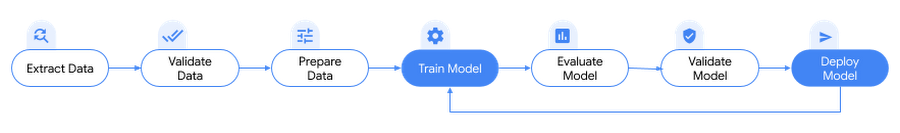

### Train a Model(Breast-Cancer-Detection)

In [ ]:
# install important Dependencies (if need)


In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Dataset and DataLoader
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# show the total rows,and columns in this dataset
df.shape

(569, 33)

In [4]:
# drop the unnecessary columns
df.drop(columns=['id','Unnamed: 32'],inplace=True)

In [5]:
# after droping this two columns , the table show like:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Train and Split

🔹 What is Train and Split?

- In machine learning, “train and split” refers to the process of:

  - Splitting your dataset into separate subsets

  - Training your model on one subset

  - Testing or validating the model on another subset

- This is essential to measure how well your model generalizes to new, unseen data.

🔹 Why Split Data?

- Prevent overfitting: If you train and test on the same data, the model may memorize it instead of learning patterns.

- Evaluate performance: Using a separate test/validation set lets you see how the model behaves on new data.

🔹 Common Splits:
| Dataset            | Purpose                                                  | Typical Ratio |
| ------------------ | -------------------------------------------------------- | ------------- |
| **Training set**   | Used to **train the model** (update weights)             | 60–80%        |
| **Validation set** | Used to **tune hyperparameters** and prevent overfitting | 10–20%        |
| **Test set**       | Used to **evaluate final model performance**             | 10–20%        |


🔹 How It Works Conceptually

- Original dataset: [X, Y] (features + labels)

- Split into:

  - X_train, Y_train → used by the model to learn

  - X_val, Y_val → used to tune hyperparameters

  - X_test, Y_test → used to test accuracy

🔹 Example in Python / PyTorch:
- from sklearn.model_selection import train_test_split

- Suppose X = features, Y = labels
  - X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Here:

- test_size=0.2 → 20% of data reserved for testing

- random_state → ensures reproducibility


In [6]:
# train and split
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0], test_size=0.2)

## Scalling

⚖️ What Is Scaling in Machine Learning (and PyTorch)?
- 🔹 Definition

  - Scaling (or feature scaling) means adjusting the range of data values so that all features (inputs) contribute equally to model training.

- In other words —
  - 👉 it’s the process of normalizing or standardizing numerical data before feeding it into a machine learning or deep learning model.

🔹 Why Scaling Is Important

- Raw data can have very different ranges:

- Example:

  - Height = 170 cm

  - Salary = 90,000

  - Age = 25

- If you feed these directly to a model:

  - The large numbers (like salary) will dominate the gradient updates.

  - The model will struggle to learn effectively because features aren’t on the same scale.

- ✅ Scaling fixes this by making all features comparable in magnitude — typically between 0 and 1 or with mean 0 and standard deviation 1.

## 🔹 Two Common Types of Scaling

### 1. Normalization (Min–Max Scaling)

- Brings all values into a fixed range — usually **[0, 1]**.

- The Min–Max scaling formula is
  - $x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$.


**Example:**  
- If your height values are [150, 180, 200]:

    - $x' = \frac{180 - 150}{200 - 150} = 0.6$


✅ **Best for:** Image pixels or bounded data (e.g., RGB values).

---
### 2. Standardization (Z-score Scaling)

- Centers data around **0** with a **standard deviation of 1**.

  - $x' = \frac{x - \mu}{\sigma}$

**Where:**
- $\( \mu \)$ = mean of the feature  
- $\( \sigma \)$ = standard deviation of the feature  

✅ **Best for:** Features that can take any value (positive or negative).


Note:

🔹 Scaling in PyTorch

- PyTorch models (especially neural networks) often benefit from normalized or standardized input tensors, because:

  - Gradients are more stable

  - Convergence is faster

  - Activation functions (like sigmoid, tanh, ReLU) work better within expected ranges

In [7]:
# scalling
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [8]:
x_train

array([[ 1.79466579, -0.33259162,  1.65532341, ...,  1.06806066,
        -0.24893606,  0.2743357 ],
       [-1.51741359, -0.13398747, -1.50999955, ..., -1.73817859,
         0.37723957, -0.15449032],
       [ 0.38109145,  0.07658079,  0.40220735, ...,  0.54603981,
        -0.10996341, -0.2074116 ],
       ...,
       [ 0.10722871,  1.39502525,  0.16564153, ...,  0.079842  ,
         0.44912198,  0.99886618],
       [-1.23829489, -0.55512399, -1.20676153, ..., -0.5130892 ,
         0.12165768,  0.7779062 ],
       [-0.99652112,  0.167508  , -1.00272853, ..., -0.72189754,
        -0.03648361, -0.35526383]])

In [9]:
y_train

,diagnosis
1,M
314,B
131,M
422,B
9,M
...,...
274,M
460,M
541,B
341,B


## Label Encoding

In [10]:
# Label this y-train data , label encoding
#Note: Label Encoding converts categorical values into integer numbers so that machine learning algorithms can process them.
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
#Note : This call also binary classification convertion
#(Binary classification is a type of supervised learning task where the model predicts one of two possible classes (labels) for each input.
#- “Binary” means two outcomes only.
#- Example: Spam detection → Spam / Not Spam)

In [11]:
y_train

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,

## Numpy array to PyTorch tensor
- In this process , all the data are in numpy(or numpy array),but we work on with pytorch. so we need to convert this numpy array to pytorch.tensor

In [12]:
# convert this in pytorch tensor
x_train_tesnor = torch.from_numpy(x_train)
x_test_tensor = torch.from_numpy(x_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [13]:
x_train_tesnor.shape

torch.Size([455, 30])

In [14]:
y_train_tensor.shape

torch.Size([455])

In [15]:
# this 4 value are tensor data
x_train_tesnor.dtype

torch.float64

## Defining the Model


In [26]:
# defining the model
class BreastCancerDetection():

    def __init__(self,x_factor):
        self.weights = torch.rand(x_factor.shape[1],1, dtype=torch.float64, requires_grad=True)
        self.bias = torch.zeros(1,dtype=torch.float64,requires_grad=True)
    def forward(self,x_factor):
        z = torch.matmul(x_factor,self.weights) + self.bias
        y_pred =torch.sigmoid(z)
        return y_pred

    def loss_function(self,y_pred,y_true):
        # Clamp predictions to avoid log(0)
        epsilon = 1e-7
        y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

        #calculate loss
        loss = -(y_true * torch.log(y_pred) + (1 - y_true)*torch.log(1 - y_pred)).mean()
        return loss

## Important Parameters


🔹 1. learning_rate:

- The learning rate controls how big a step the optimizer takes when updating the model’s weights after each batch or epoch.

🔹 2. epochs:

- An epoch means one complete pass through the entire training dataset.

🔹 Summary Table:

| Hyperparameter    | Description                              | Effect                             |
| ----------------- | ---------------------------------------- | ---------------------------------- |
| **learning_rate** | Step size for weight updates             | Controls how fast the model learns |
| **epochs**        | Number of full passes over training data | Controls how long the model trains |



🔹 Analogy:

- Think of training a student 🧠:

  - Learning rate = how big each “learning step” is.

  - Epochs = how many times the student studies the full textbook.

In [24]:
learning_rate = 0.1
epochs = 25

## Training Pipeline

In [35]:
# create model
model = BreastCancerDetection(x_train_tesnor)

#define loop
for epoch in range(epochs):

    #forward pass
    y_pred = model.forward(x_train_tesnor)

    #loss calculate
    loss = model.loss_function(y_pred,y_train_tensor)

    #backward pass( back propagation )
    loss.backward()

    #parameters update (θnew​=θold​−learning rate×∇θ​L)
    with torch.no_grad():
        model.weights -= learning_rate * model.weights.grad
        model.bias -= learning_rate * model.bias.grad

    # zero gradients
    model.weights.grad.zero_()
    model.bias.grad.zero_()

    #print loss in each epoch
    print(f'Epoch: {epoch+1}, Loss: {loss.item()}')



Epoch: 1, Loss: 3.3341548786873405
Epoch: 2, Loss: 3.1960517621417974
Epoch: 3, Loss: 3.0548695711109395
Epoch: 4, Loss: 2.908228339090938
Epoch: 5, Loss: 2.757023930768979
Epoch: 6, Loss: 2.5986726270939573
Epoch: 7, Loss: 2.4355427328632513
Epoch: 8, Loss: 2.2727809329072146
Epoch: 9, Loss: 2.1088806253395136
Epoch: 10, Loss: 1.9418364287062362
Epoch: 11, Loss: 1.7791239784024937
Epoch: 12, Loss: 1.623980752542188
Epoch: 13, Loss: 1.4762313717070172
Epoch: 14, Loss: 1.3414618416188575
Epoch: 15, Loss: 1.22175969323951
Epoch: 16, Loss: 1.118792197480678
Epoch: 17, Loss: 1.0334164918672029
Epoch: 18, Loss: 0.9654386608003406
Epoch: 19, Loss: 0.9135142723524687
Epoch: 20, Loss: 0.8751448804913203
Epoch: 21, Loss: 0.8471023186495115
Epoch: 22, Loss: 0.8262966483706792
Epoch: 23, Loss: 0.8103619403616646
Epoch: 24, Loss: 0.7976976950542608
Epoch: 25, Loss: 0.7872752563038334


In [36]:
model.bias

tensor([-0.1852], dtype=torch.float64, requires_grad=True)

## Evalution

In [37]:
#model evaluation
with torch.no_grad():
    y_pred = model.forward(x_test_tensor)
    y_pred = (y_pred > 0.9).float()
    accuracy = (y_pred == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.5931055545806885


---

# New Projects

- Dataset and DataLoader

In [38]:
import torch
import torchvision
import torchvision.transforms as transforms

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.91MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.98MB/s]


Training set has 60000 instances
Validation set has 10000 instances


- As always, let’s visualize the data as a sanity check:

Bag  T-shirt/top  Coat  Shirt


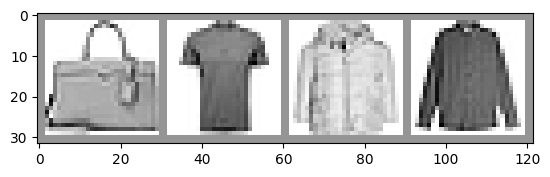

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))

- The Model

In [40]:
import torch.nn as nn
import torch.nn.functional as F

# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = GarmentClassifier()

- Loss Function

In [41]:
loss_fn = torch.nn.CrossEntropyLoss()

# NB: Loss functions expect data in batches, so we're creating batches of 4
# Represents the model's confidence in each of the 10 classes for a given input
dummy_outputs = torch.rand(4, 10)
# Represents the correct class among the 10 being tested
dummy_labels = torch.tensor([1, 5, 3, 7])

print(dummy_outputs)
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {}'.format(loss.item()))

tensor([[0.6460, 0.5978, 0.5396, 0.1145, 0.2978, 0.5159, 0.1553, 0.1609, 0.2219,
         0.2893],
        [0.0294, 0.2942, 0.1892, 0.6093, 0.6510, 0.1355, 0.1014, 0.4893, 0.6530,
         0.5105],
        [0.4636, 0.6398, 0.7652, 0.4787, 0.1090, 0.8364, 0.4472, 0.9398, 0.3139,
         0.8739],
        [0.9111, 0.2535, 0.2295, 0.2645, 0.8662, 0.1193, 0.9831, 0.0559, 0.4350,
         0.3760]])
tensor([1, 5, 3, 7])
Total loss for this batch: 2.457749366760254


- Optimizer

In [42]:
# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

- The Training Loop

In [43]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

- Per-Epoch Activity

In [44]:
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 1000 loss: 1.7312096574157476
  batch 2000 loss: 0.834874029875733
  batch 3000 loss: 0.6858059038594365
  batch 4000 loss: 0.63436477379594
  batch 5000 loss: 0.5913170832023025
  batch 6000 loss: 0.5430957273151725
  batch 7000 loss: 0.5127645575586939
  batch 8000 loss: 0.49665540803154
  batch 9000 loss: 0.4720473267333582
  batch 10000 loss: 0.4649958499867935
  batch 11000 loss: 0.45348154025617987
  batch 12000 loss: 0.4240891420042026
  batch 13000 loss: 0.43236038184945935
  batch 14000 loss: 0.4208376661002112
  batch 15000 loss: 0.417207824705285
LOSS train 0.417207824705285 valid 0.4028433561325073
EPOCH 2:
  batch 1000 loss: 0.3889011275761295
  batch 2000 loss: 0.3747156089487253
  batch 3000 loss: 0.4018591681279359
  batch 4000 loss: 0.37550870363414285
  batch 5000 loss: 0.3790470511323365
  batch 6000 loss: 0.3589191690974403
  batch 7000 loss: 0.36356107307370983
  batch 8000 loss: 0.34129043125649333
  batch 9000 loss: 0.3849955674222438
  batch 100

- To load a saved version of the model:

In [45]:
saved_model = GarmentClassifier()
# Assuming you want to load the model from the last epoch saved during training
# The filenames are in the format 'model_YYYYMMDD_HHMMSS_epoch_number'
# Replace 'model_20251019_202702_4' with the actual filename you want to load
PATH = 'model_20251019_202702_4'
saved_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>